In [1]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from datetime import datetime
from datetime import date

In [3]:
data = pd.read_csv("ufc_data.csv")

In [4]:
ufc = data.drop(['CareerStats.FighterId',
              'CareerStats.FirstName',
              'CareerStats.LastName',
              'CareerStats'], axis=1)

ufc.columns=ufc.columns.str.replace('CareerStats.','')

In [5]:
# Create total fights 

ufc['FightNumber'] = ufc["Wins"] + ufc["Losses"] + ufc["Draws"] + ufc["NoContests"]

# Win to Loss Ratio 

ufc["WinLossRatio"] = (ufc['Wins'] / ufc['Losses'])

# Win to total fight Ratio

ufc["WinFightRatio"] = (ufc['Wins'] / ufc['FightNumber'])

In [6]:
ufc['female'] = ufc['WeightClass'].str.contains("Women")

In [7]:
def clean_gender(ufc):
    if (ufc['female'] == False):
        return "Male"
    elif (ufc['female'] == True):
        return "Female"

In [8]:
ufc['Gender'] = ufc.apply(clean_gender, axis = 1)

In [9]:
ufc['WeightClass'] = ufc['WeightClass'].str.replace("Women's ",'')
now = pd.to_datetime('now')
ufc['BirthDate'] = pd.to_datetime(ufc['BirthDate'])
ufc['Age'] = (now.year - ufc['BirthDate'].dt.year) - ((now.month - ufc['BirthDate'].dt.month) < 0)
ufc['AgeAvgDiff']=ufc.groupby(['WeightClass'])['Age'].apply(lambda x: x-x.mean())
ufc['ReachAvgDiff']=ufc.groupby(['WeightClass'])['Reach'].apply(lambda x: x-x.mean())
ufc.loc[ufc['ReachAvgDiff'] < -20,'ReachAvgDiff'] = np.nan

In [10]:
ufc['HeightAvgDiff']=ufc.groupby(['WeightClass'])['Height'].apply(lambda x: x-x.mean())
ufc.loc[ufc['HeightAvgDiff'] < -20,'HeightAvgDiff'] = np.nan

In [11]:
ufc_female = ufc[ufc['Gender'] == 'Female']
ufc_male = ufc[ufc['Gender'] == 'Male']

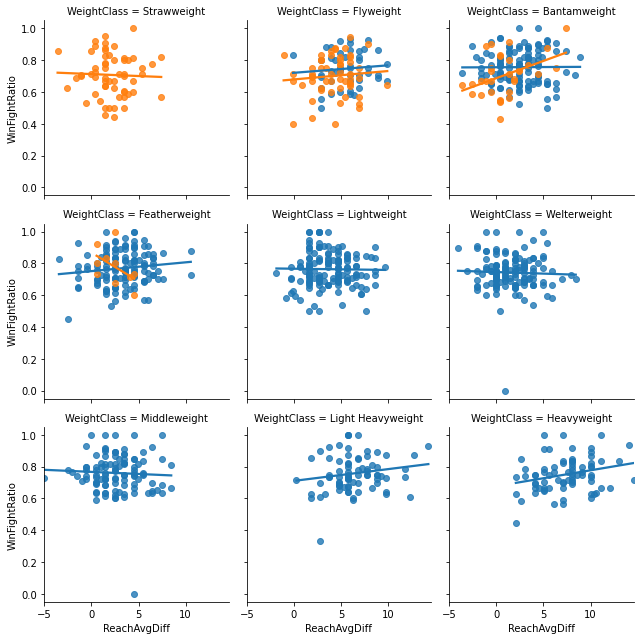

In [12]:
g = sns.FacetGrid(ufc, col="WeightClass", hue = 'Gender', height=3, col_wrap=3, col_order=['Strawweight','Flyweight','Bantamweight', 
                                              'Featherweight', 'Lightweight', 'Welterweight',
                                              'Middleweight', 'Light Heavyweight', 'Heavyweight'])
g.map(sns.regplot, "ReachAvgDiff", "WinFightRatio", ci = None)

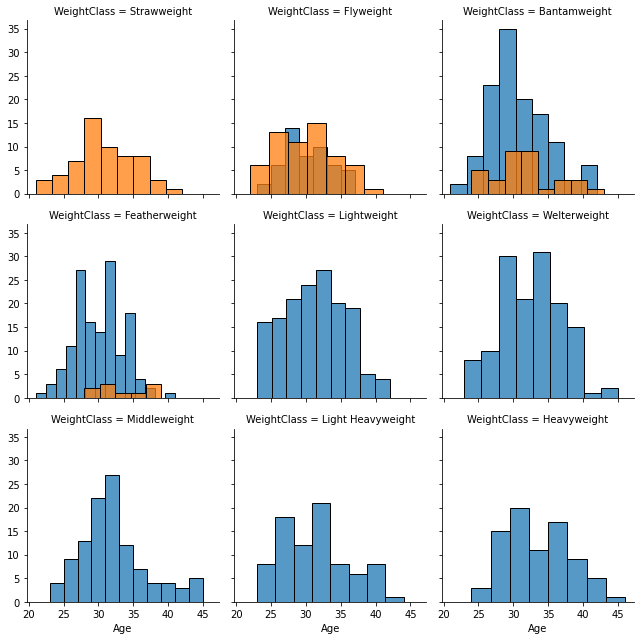

In [15]:
g = sns.FacetGrid(ufc, col="WeightClass",height=3, col_wrap=3, hue = 'Gender', col_order=['Strawweight','Flyweight','Bantamweight', 
                                              'Featherweight', 'Lightweight', 'Welterweight',
                                              'Middleweight', 'Light Heavyweight', 'Heavyweight'])
g.map(sns.histplot, "Age", fill = True)

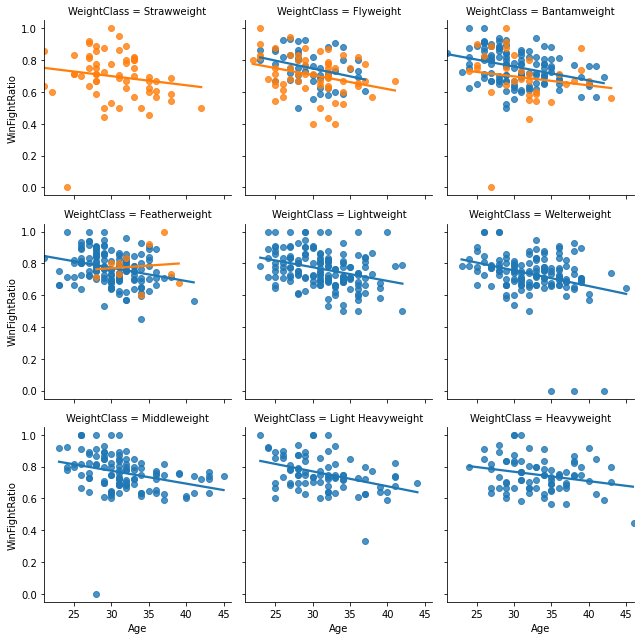

In [16]:
g = sns.FacetGrid(ufc, col="WeightClass", hue = 'Gender', height=3, col_wrap=3, col_order=['Strawweight','Flyweight','Bantamweight', 
                                              'Featherweight', 'Lightweight', 'Welterweight',
                                              'Middleweight', 'Light Heavyweight', 'Heavyweight'])
g.map(sns.regplot, "Age", "WinFightRatio", order = 1, ci = None)